In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1 - Предобработка данных

In [3]:
df = pd.read_csv("pokemon.csv")

In [5]:
df.head(8)

,Name,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,Mega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65
5,Charmeleon,405,58,64,58,80,65,80
6,Charizard,534,78,84,78,109,85,100
7,Mega Charizard,634,78,130,111,130,85,100


### Описание признаков
* Name - Имя покемона
* Total - Общие показатели покемона
* HP - Здоровье
* Attack - Урон (Атака)
* Defence - Защита от атак врага
* SP_attack - Атака от специального приема (Способности)
* SP_defence - Защита от специального приема врага (Способности врага)
* Speed - Скорость покемона

In [9]:
df.shape

(1045, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1045 non-null   object
 1   Total       1045 non-null   int64 
 2   HP          1045 non-null   int64 
 3   Attack      1045 non-null   int64 
 4   Defence     1045 non-null   int64 
 5   Sp_attack   1045 non-null   int64 
 6   Sp_defence  1045 non-null   int64 
 7   Speed       1045 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 65.4+ KB


Видим что пропущенных значений нет

In [8]:
df.describe()

,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,439.314833,70.067943,80.466986,74.661244,73.022010,72.288995,68.807656
std,121.970701,26.671411,32.413665,31.237903,32.724797,28.074148,30.210094
min,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000
50%,458.000000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000
75%,515.000000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [12]:
df[df["Name"] == "Pikachu"]

,Name,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
32,Pikachu,320,35,55,40,50,50,90


In [15]:
df[df["Name"] == "Mega Pikachu"]

,Name,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
33,Mega Pikachu,430,45,80,50,75,60,120


# 2 - Построение моделей 

Мы видим наш датасет в котром содержится 1045 записей, это не много, поэтому нам надо использовать модель которая сможет показать хороший результат основываясь на малом количестве записей

In [130]:
from sklearn.cluster import KMeans

In [131]:
x = df.iloc[:, 1:]

In [132]:
x

,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed,cluster
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,0
2,525,80,82,83,100,100,80,0
3,625,80,100,123,122,120,80,2
4,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...
1040,580,100,145,130,65,110,30,2
1041,580,100,65,60,145,80,130,2
1042,500,100,80,80,80,80,80,0
1043,680,100,165,150,85,130,50,2


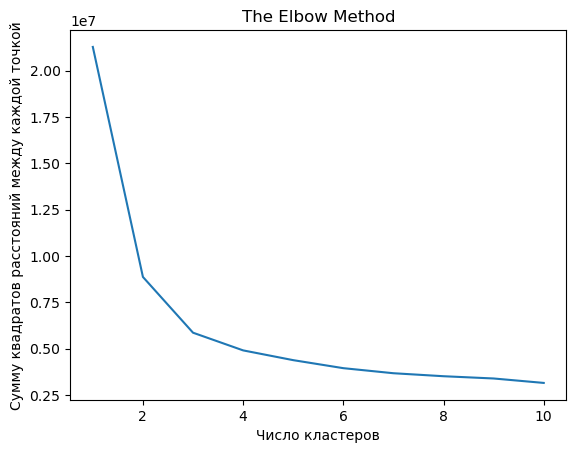

In [133]:
lst = []
for i in range (1, 11):
    kmean = KMeans(n_clusters = i, random_state=42)
    kmean.fit(x)
    lst.append(kmean.inertia_)
plt.plot(range(1, 11), lst)
plt.title('The Elbow Method')
plt.xlabel('Число кластеров')
plt.ylabel('Сумму квадратов расстояний между каждой точкой')
plt.show()

In [134]:
x.corr()

,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed,cluster
Total,1.000000,0.650805,0.733256,0.629798,0.732996,0.720227,0.561562,0.139874
HP,0.650805,1.000000,0.444125,0.300300,0.371534,0.393311,0.189705,0.021138
Attack,0.733256,0.444125,1.000000,0.457671,0.368751,0.267633,0.374018,0.136086
Defence,0.629798,0.300300,0.457671,1.000000,0.223481,0.544191,0.004756,0.043400
Sp_attack,0.732996,0.371534,0.368751,0.223481,1.000000,0.511980,0.445640,0.178164
Sp_defence,0.720227,0.393311,0.267633,0.544191,0.511980,1.000000,0.226861,0.049021
Speed,0.561562,0.189705,0.374018,0.004756,0.445640,0.226861,1.000000,0.116631
cluster,0.139874,0.021138,0.136086,0.043400,0.178164,0.049021,0.116631,1.000000


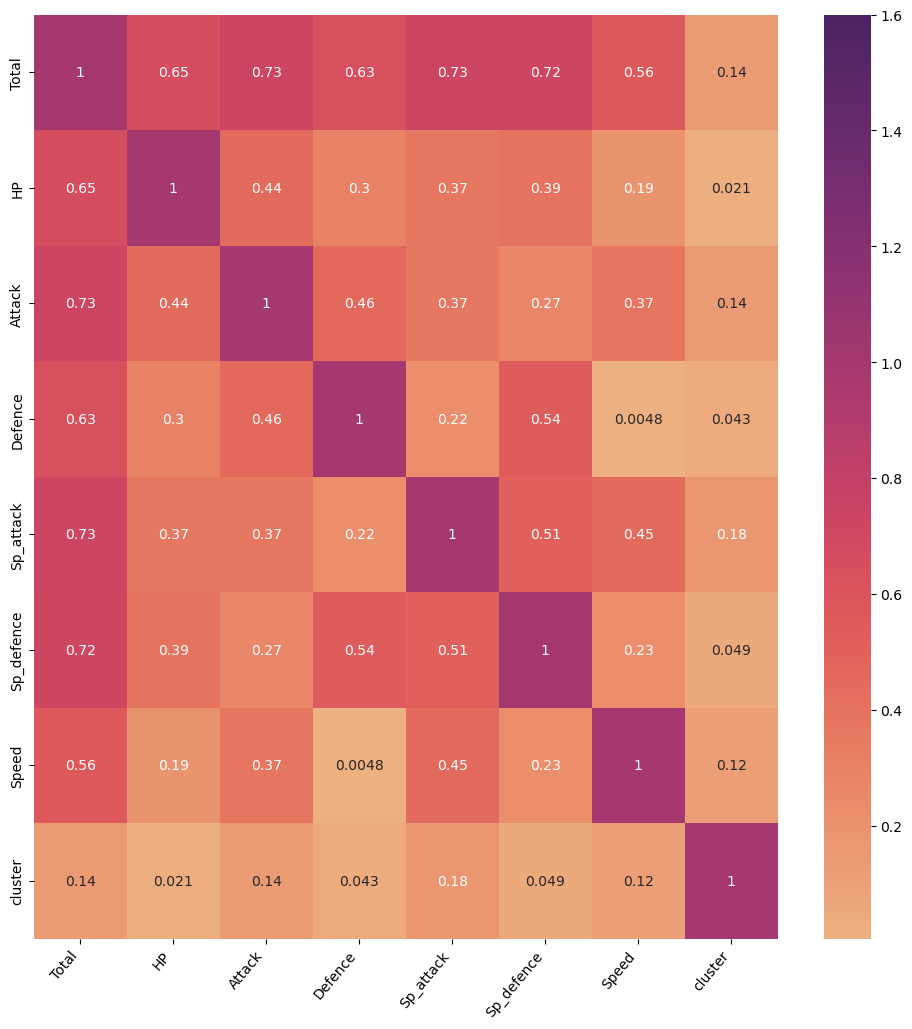

In [135]:
plt.figure(figsize = (12,12))
sns.heatmap(x.corr(), cmap = sns.color_palette("flare", as_cmap=True),annot = True,vmax = 1.6);
plt.xticks(rotation=50, ha='right');

Видим что наш HeatMap показывает хорошие кореляции между признаками, нету кореляций которые могли бы нам помешать в обучении моделей или кластеризации

In [24]:
n_cluster = 3

In [25]:
kmeans = KMeans(n_clusters=n_cluster, n_init=10)

In [26]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

In [31]:
pred = kmeans.fit_predict(X)

In [37]:
pred

array([1, 0, 0, ..., 0, 2, 2])

In [38]:
pred.mean()

0.6679425837320574

In [33]:
labels = kmeans.labels_

In [39]:
labels

array([1, 0, 0, ..., 0, 2, 2])

In [42]:
df["cluster"] = pd.Series(labels)

In [43]:
df.sample(5)

,Name,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed,cluster
324,Silcoon,205,50,35,55,25,25,15,1
765,Fennekin,307,40,45,40,62,60,60,1
814,Aurorus,521,123,77,72,99,92,58,0
491,Cranidos,350,67,125,40,30,30,58,1
195,Mega Mewtwo X,780,106,150,70,194,120,140,2


In [47]:
df.cluster.value_counts()

0    517
1    358
2    170
Name: count, dtype: int64

Мы видим что распределение кластеров произошло по большей части у 0

In [103]:
df[df.cluster == 0].describe()

,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed,cluster
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.0
mean,474.243714,76.636364,86.135397,81.348162,77.671180,79.421663,73.030948,0.0
std,40.965132,22.715789,24.715847,26.551739,24.439932,21.792542,27.116584,0.0
min,385.000000,20.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.0
25%,440.000000,61.000000,69.000000,65.000000,60.000000,65.000000,52.000000,0.0
50%,483.000000,72.000000,85.000000,75.000000,76.000000,75.000000,70.000000,0.0
75%,505.000000,85.000000,100.000000,95.000000,95.000000,90.000000,93.000000,0.0
max,545.000000,255.000000,165.000000,230.000000,145.000000,230.000000,160.000000,0.0


В кластере 0 мы видим распределение по признакам: attack, SP_attack

In [104]:
df[df.cluster == 1].describe()

,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed,cluster
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.0
mean,301.611732,49.879888,54.575419,52.421788,47.011173,48.717877,49.005587,1.0
std,46.619235,15.288068,19.300039,20.209499,16.822850,15.239498,19.438907,0.0
min,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.0
25%,275.000000,40.000000,40.000000,40.000000,35.000000,40.000000,35.000000,1.0
50%,305.000000,49.000000,55.000000,50.000000,45.000000,48.000000,48.000000,1.0
75%,330.000000,57.750000,66.000000,60.000000,58.000000,55.000000,64.750000,1.0
max,390.000000,135.000000,125.000000,160.000000,125.000000,120.000000,100.000000,1.0


В кластере 1 мы видим распределение по признакам: HP, attack, Sp_defence

In [105]:
df[df.cluster == 2].describe()

,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed,cluster
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.0
mean,623.076471,92.605882,117.752941,101.158824,113.658824,100.235294,97.664706,2.0
std,65.714372,28.617100,30.356620,33.495978,32.149081,28.460976,29.525026,0.0
min,550.000000,45.000000,50.000000,20.000000,40.000000,20.000000,13.000000,2.0
25%,580.000000,78.250000,100.000000,80.000000,93.500000,85.000000,81.500000,2.0
50%,600.000000,90.000000,120.000000,98.500000,112.500000,100.000000,100.000000,2.0
75%,670.000000,100.000000,138.500000,115.000000,135.000000,115.000000,110.750000,2.0
max,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,2.0


В кластере 2 мы видим распределение по признакам: Sp_attack, Sp_defence

In [100]:
x = df.iloc[:, [1, 7]].values

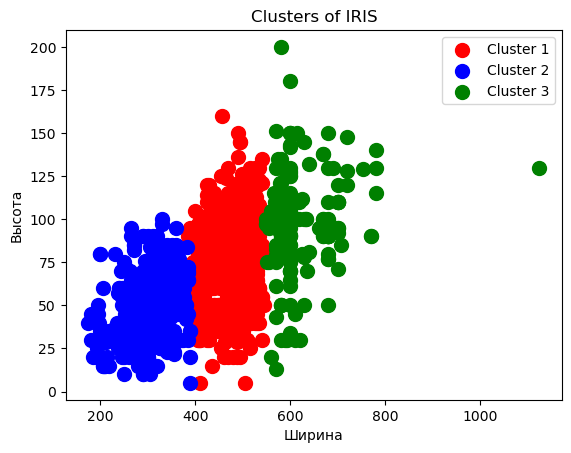

In [106]:
plt.scatter(x[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[pred == 2, 0], X[pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of IRIS')
plt.xlabel("Ширина")
plt.ylabel("Высота")
plt.legend()
plt.show()

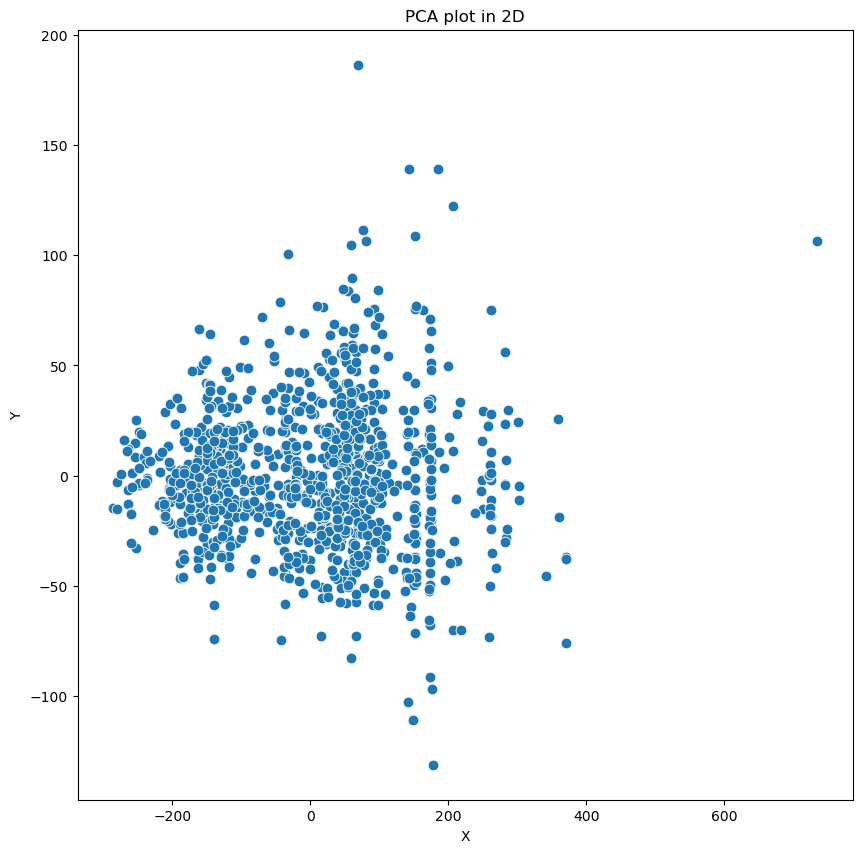

In [156]:
principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(x))
    
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                s=60)

plt.title('PCA plot in 2D')
plt.xlabel('X')
plt.ylabel('Y');

In [109]:
from sklearn.decomposition import PCA
import plotly.express as px

In [152]:
def PCAplot3D(x_data, y_data=None):
    components = PCA(n_components=3).fit_transform(x_data)

    fig = px.scatter_3d(
        components, 
        x=0, y=1, z=2, 
        color=y_data, 
        size=0.1*np.ones(len(x)), 
        opacity = 1,
        title='PCA plot in 3D',
        labels={'0': 'X', '1': 'Y', '2': 'Z'},
        width=900, height=900
    )
    fig.show()

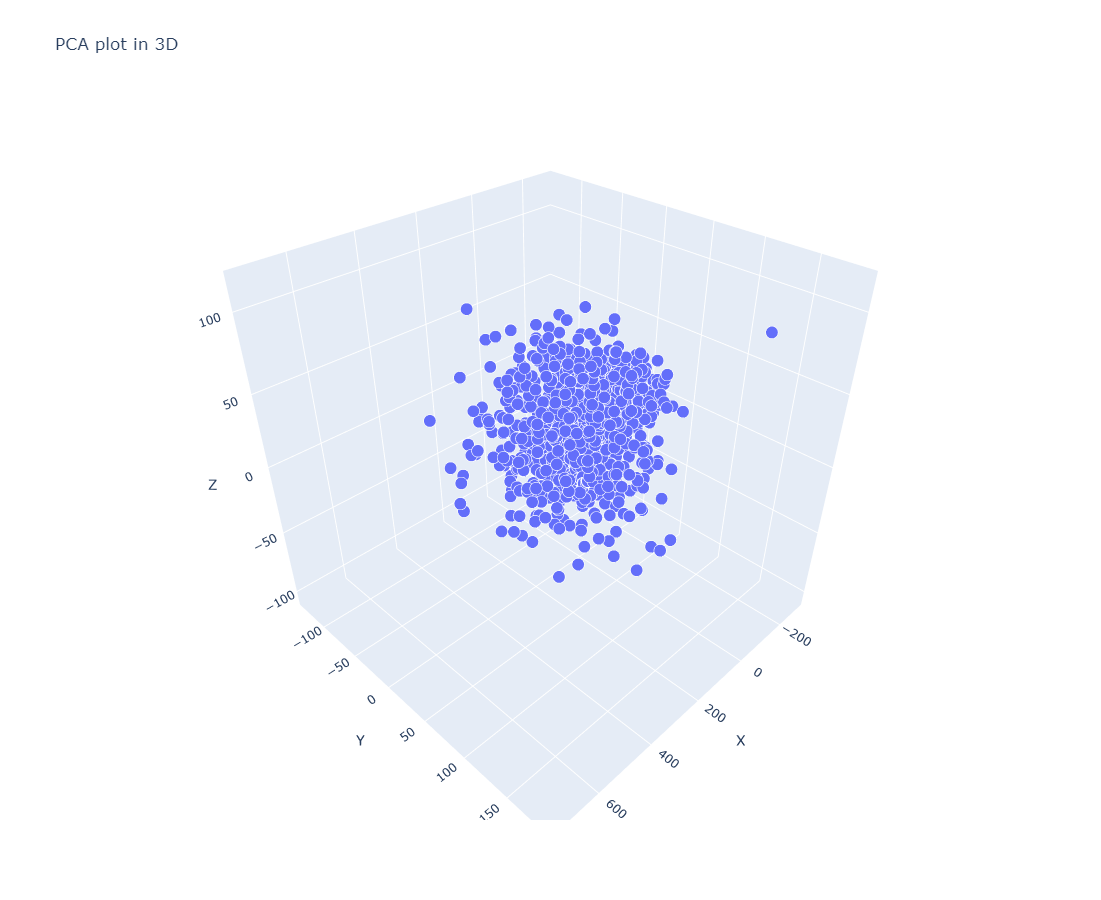

In [153]:
PCAplot3D(x)